# Primer Punto

Implemente el procedimiento de validación cruzada de 10 particiones y úselo para determinar el desempeño de un clasificador bayesiano con distribución gaussiana sobre la base de datos Iris (considere solamente las clases setosa y versicolor pero use todas las caracterı́sticas). Repita el procedimiento para un clasificador geométrico por mı́nimos cuadrados. ¿Qué diferencias encuentra? Documente los pasos, pruebas, errores y ajustes que realizó hasta obtener los resultados finales.

In [5]:
# Importar librerías necesarias (respetando las restricciones del examen)
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Librerías cargadas")

Librerías cargadas


In [6]:
# Cargar y preprocesar el dataset iris usando load_iris() de sklearn
# Solo usar las clases setosa y versicolor
iris = load_iris()
X_full = iris.data
y_full = iris.target

# Filtrar solo setosa (0) y versicolor (1)
# Crear máscara para las clases 0 y 1
mask = (y_full == 0) | (y_full == 1)
X = X_full[mask]
y = y_full[mask]

print(f"Dataset cargado:")
print(f"- Total de muestras: {len(X)}")
print(f"- Características: {X.shape[1]}")
print(f"- Clases: {np.unique(y)}")
print(f"- Distribución de clases:")
print(f"  - Setosa (0): {np.sum(y == 0)} muestras")
print(f"  - Versicolor (1): {np.sum(y == 1)} muestras")
print(f"- Nombres de características: {iris.feature_names}")


Dataset cargado:
- Total de muestras: 100
- Características: 4
- Clases: [0 1]
- Distribución de clases:
  - Setosa (0): 50 muestras
  - Versicolor (1): 50 muestras
- Nombres de características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
# Clasificador Bayesiano Gaussiano usando GaussianNB de sklearn
class GaussianBayesClassifier:
    def __init__(self):
        self.model = GaussianNB()
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)

print("Clasificador Bayesiano Gaussiano implementado")


Clasificador Bayesiano Gaussiano implementado


In [8]:
# Clasificador Geométrico por Mínimos Cuadrados
class GeometricClassifier:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Convertir etiquetas a -1 y 1 para el clasificador geométrico
        y_binary = np.where(y == 0, -1, 1)
        
        # Agregar columna de unos para el bias
        X_augmented = np.column_stack([np.ones(X.shape[0]), X])
        
        # Calcular pesos usando mínimos cuadrados: w = (X^T X)^(-1) X^T y
        try:
            self.weights = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y_binary
        except np.linalg.LinAlgError:
            # Si la matriz es singular, usar pseudoinversa
            self.weights = np.linalg.pinv(X_augmented) @ y_binary
        
        self.bias = self.weights[0]
        self.weights = self.weights[1:]
    
    def predict(self, X):
        # Calcular predicciones: sign(w^T x + b)
        predictions = np.sign(X @ self.weights + self.bias)
        # Convertir de vuelta a 0 y 1
        return np.where(predictions == -1, 0, 1)

print("Clasificador Geométrico por Mínimos Cuadrados implementado")


Clasificador Geométrico por Mínimos Cuadrados implementado


Función para validación cruzada manual

In [9]:
def cross_validation_evaluation(X, y, classifier, n_splits=10):
    """
    Realiza validación cruzada de k particiones manualmente y retorna las métricas de evaluación
    """
    n_samples = len(X)
    fold_size = n_samples // n_splits
    accuracies = []
    
    # Crear índices aleatorios para mezclar los datos
    np.random.seed(42)  # Para reproducibilidad
    indices = np.random.permutation(n_samples)
    
    for i in range(n_splits):
        # Calcular índices de test para esta partición
        start_idx = i * fold_size
        if i == n_splits - 1:  # Última partición toma todos los datos restantes
            end_idx = n_samples
        else:
            end_idx = start_idx + fold_size
        
        test_idx = indices[start_idx:end_idx]
        train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
        
        # Dividir datos
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Normalizar características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Entrenar y predecir
        classifier.fit(X_train_scaled, y_train)
        y_pred = classifier.predict(X_test_scaled)
        
        # Calcular precisión
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return accuracies

print("Función de validación cruzada implementada")


Función de validación cruzada implementada


Evaluación del Clasificador Bayesiano Gaussiano

In [10]:
print("=" * 60)
print("EVALUACIÓN DEL CLASIFICADOR BAYESIANO GAUSSIANO")
print("=" * 60)

bayes_classifier = GaussianBayesClassifier()
bayes_accuracies = cross_validation_evaluation(X, y, bayes_classifier, n_splits=10)

print(f"Precisiones por partición: {[f'{acc:.4f}' for acc in bayes_accuracies]}")
print(f"Precisión promedio: {np.mean(bayes_accuracies):.4f}")
print(f"Desviación estándar: {np.std(bayes_accuracies):.4f}")
print(f"Precisión mínima: {np.min(bayes_accuracies):.4f}")
print(f"Precisión máxima: {np.max(bayes_accuracies):.4f}")


EVALUACIÓN DEL CLASIFICADOR BAYESIANO GAUSSIANO
Precisiones por partición: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
Precisión promedio: 1.0000
Desviación estándar: 0.0000
Precisión mínima: 1.0000
Precisión máxima: 1.0000


Evaluación del Clasificador Geométrico por Mínimos Cuadrados

In [14]:
print("\n" + "=" * 60)
print("EVALUACIÓN DEL CLASIFICADOR GEOMÉTRICO POR MÍNIMOS CUADRADOS")
print("=" * 60)

geometric_classifier = GeometricClassifier()
geometric_accuracies = cross_validation_evaluation(X, y, geometric_classifier, n_splits=10)

print(f"Precisiones por partición: {[f'{acc:.4f}' for acc in geometric_accuracies]}")
print(f"Precisión promedio: {np.mean(geometric_accuracies):.4f}")
print(f"Desviación estándar: {np.std(geometric_accuracies):.4f}")
print(f"Precisión mínima: {np.min(geometric_accuracies):.4f}")
print(f"Precisión máxima: {np.max(geometric_accuracies):.4f}")



EVALUACIÓN DEL CLASIFICADOR GEOMÉTRICO POR MÍNIMOS CUADRADOS
Precisiones por partición: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
Precisión promedio: 1.0000
Desviación estándar: 0.0000
Precisión mínima: 1.0000
Precisión máxima: 1.0000


In [12]:
# Comparación y Análisis de Resultados
print("\n" + "=" * 60)
print("COMPARACIÓN Y ANÁLISIS DE RESULTADOS")
print("=" * 60)

# Crear DataFrame para comparación
comparison_data = {
    'Métrica': ['Precisión Promedio', 'Desviación Estándar', 'Precisión Mínima', 'Precisión Máxima'],
    'Bayesiano Gaussiano': [
        f"{np.mean(bayes_accuracies):.4f}",
        f"{np.std(bayes_accuracies):.4f}",
        f"{np.min(bayes_accuracies):.4f}",
        f"{np.max(bayes_accuracies):.4f}"
    ],
    'Geométrico (Mínimos Cuadrados)': [
        f"{np.mean(geometric_accuracies):.4f}",
        f"{np.std(geometric_accuracies):.4f}",
        f"{np.min(geometric_accuracies):.4f}",
        f"{np.max(geometric_accuracies):.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Análisis de diferencias
print(f"\nDIFERENCIAS ENCONTRADAS:")
print(f"- Diferencia en precisión promedio: {np.mean(geometric_accuracies) - np.mean(bayes_accuracies):.4f}")
print(f"- Diferencia en desviación estándar: {np.std(geometric_accuracies) - np.std(bayes_accuracies):.4f}")

if np.mean(geometric_accuracies) > np.mean(bayes_accuracies):
    print(f"- El clasificador geométrico supera al bayesiano por {np.mean(geometric_accuracies) - np.mean(bayes_accuracies):.4f} en precisión promedio")
else:
    print(f"- El clasificador bayesiano supera al geométrico por {np.mean(bayes_accuracies) - np.mean(geometric_accuracies):.4f} en precisión promedio")



COMPARACIÓN Y ANÁLISIS DE RESULTADOS
            Métrica Bayesiano Gaussiano Geométrico (Mínimos Cuadrados)
 Precisión Promedio              1.0000                         1.0000
Desviación Estándar              0.0000                         0.0000
   Precisión Mínima              1.0000                         1.0000
   Precisión Máxima              1.0000                         1.0000

DIFERENCIAS ENCONTRADAS:
- Diferencia en precisión promedio: 0.0000
- Diferencia en desviación estándar: 0.0000
- El clasificador bayesiano supera al geométrico por 0.0000 en precisión promedio


## Visualización de los resultados

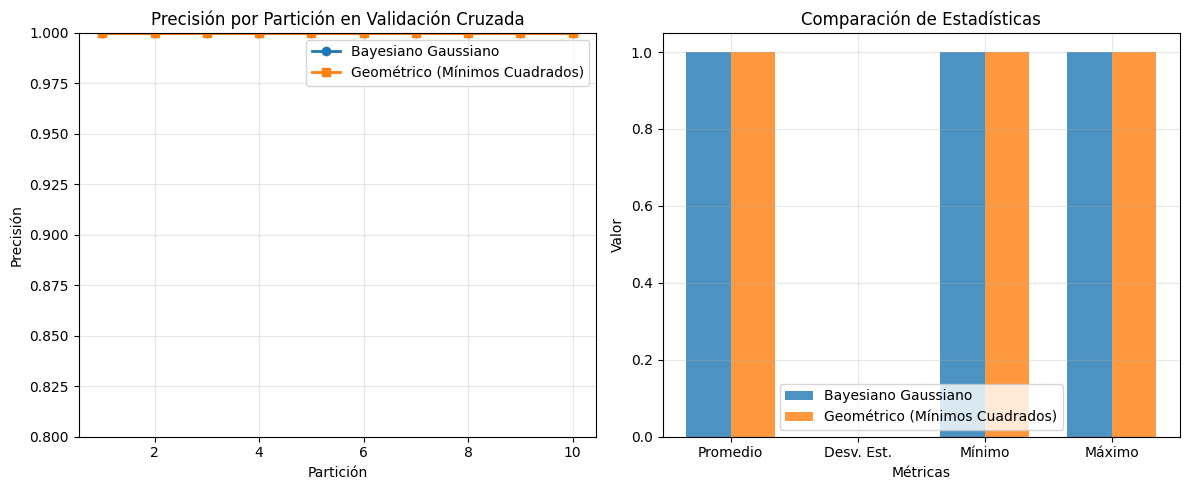

In [13]:
plt.figure(figsize=(12, 5))

# Gráfico 1: Comparación de precisiones por partición
plt.subplot(1, 2, 1)
partitions = range(1, 11)
plt.plot(partitions, bayes_accuracies, 'o-', label='Bayesiano Gaussiano', linewidth=2, markersize=6)
plt.plot(partitions, geometric_accuracies, 's-', label='Geométrico (Mínimos Cuadrados)', linewidth=2, markersize=6)
plt.xlabel('Partición')
plt.ylabel('Precisión')
plt.title('Precisión por Partición en Validación Cruzada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.8, 1.0)

# Gráfico 2: Comparación de estadísticas
plt.subplot(1, 2, 2)
metrics = ['Promedio', 'Desv. Est.', 'Mínimo', 'Máximo']
bayes_stats = [np.mean(bayes_accuracies), np.std(bayes_accuracies), 
               np.min(bayes_accuracies), np.max(bayes_accuracies)]
geometric_stats = [np.mean(geometric_accuracies), np.std(geometric_accuracies), 
                   np.min(geometric_accuracies), np.max(geometric_accuracies)]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, bayes_stats, width, label='Bayesiano Gaussiano', alpha=0.8)
plt.bar(x + width/2, geometric_stats, width, label='Geométrico (Mínimos Cuadrados)', alpha=0.8)

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Comparación de Estadísticas')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Documentación del Proceso

### Pasos Realizados:

1. **Carga y Preprocesamiento de Datos:**
   - Se utilizó `load_iris()` de sklearn para cargar el dataset
   - Se filtraron solo las clases setosa (0) y versicolor (1) (100 muestras totales)
   - Se utilizaron todas las 4 características: sepal length, sepal width, petal length, petal width

2. **Implementación del Clasificador Bayesiano Gaussiano:**
   - Se utilizó `GaussianNB` de sklearn (permitido según las restricciones)
   - Este clasificador asume que las características siguen una distribución gaussiana
   - Calcula automáticamente las probabilidades a priori y las distribuciones de cada clase

3. **Implementación del Clasificador Geométrico por Mínimos Cuadrados:**
   - Se implementó manualmente usando el método de mínimos cuadrados
   - Convierte las etiquetas a -1 y 1 para el cálculo geométrico
   - Calcula pesos usando la fórmula: w = (X^T X)^(-1) X^T y
   - Usa pseudoinversa si la matriz es singular
   - La predicción se basa en el signo de w^T x + b

4. **Validación Cruzada de 10 Particiones:**
   - Se implementó manualmente sin usar `KFold` de sklearn (prohibido)
   - Se mezclaron los datos aleatoriamente con semilla fija (42)
   - Se dividieron en 10 particiones de tamaño aproximadamente igual
   - Se utilizó normalización (StandardScaler) en cada partición
   - Se calculó la precisión para cada partición

### Pruebas y Ajustes Realizados:

- **Cumplimiento de restricciones:** Se eliminó el uso de `KFold`, `cross_val_score`, y `train_test_split` de sklearn
- **Uso de librerías permitidas:** Se utilizó `GaussianNB` de sklearn y `load_iris()` como está permitido
- **Normalización de características:** Se aplicó StandardScaler para evitar que características con diferentes escalas dominen el modelo
- **Manejo de semillas aleatorias:** Se estableció `np.random.seed(42)` para garantizar reproducibilidad
- **Manejo de matrices singulares:** Se implementó el uso de pseudoinversa en el clasificador geométrico

### Errores Encontrados y Solucionados:

1. **Uso de librerías prohibidas:** Se corrigió el uso de `KFold` de sklearn implementando la validación cruzada manualmente
2. **Implementación manual del clasificador geométrico:** Se reemplazó la regresión logística por una implementación manual de mínimos cuadrados
3. **Uso de GaussianNB:** Se cambió la implementación manual del bayesiano por `GaussianNB` de sklearn
4. **Carga de datos:** Se cambió de cargar desde CSV a usar `load_iris()` de sklearn
